# Howto classify articles with scikit-learn

This notebook aims to demonstrate the ability of scikit-learn to process articles published on the french website linuxfr.org. The data are collected with a short script that convert the atom feed of the journals into a csv file. In order to minimize the lenght of this scrit, it will not fetches the score of the article.

## Useful resources



## Read the data

This section describes the convertion of article fromp CSV to dµpanda dataframe.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import matplotlib
# Enable inline plotting
%matplotlib inline
filename = r'linuxfr.csv'
lf_data = pd.read_csv(filename, encoding="UTF-8", sep='£', engine='python', quotechar='µ')
lf_data.dtypes

title               object
author              object
url                 object
score              float64
content             object
quality_content     object
count              float64
dtype: object

In [5]:
lf_data.quality_content.value_counts()

Average Troll        2614
Quality Troll        2545
Great Troll           460
Magnificent Troll     302
Name: quality_content, dtype: int64

In [6]:
lf_data.groupby('quality_content').describe()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>count</th>
      <th>score</th>
    </tr>
    <tr>
      <th>quality_content</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="8" valign="top">Average Troll</th>
      <th>count</th>
      <td>2026.0</td>
      <td>2614.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.0</td>
      <td>11.191660</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.0</td>
      <td>5.001683</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.0</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>0.0</td>
      <td>7.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>0.0</td>
      <td>12.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>0.0</td>
      <td>15.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>0.0</td>
      <td>19.000000</td>
    </tr>
    <tr>
      <th rowspan="8" valign="top">Great Troll</th>
      <th>count</th>
      <td>368.0</td>
      <td>460.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.0</td>
      <td>-7.234783</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.0</td>
      <td>5.808611</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.0</td>
      <td>-19.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>0.0</td>
      <td>-12.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>0.0</td>
      <td>-6.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>0.0</td>
      <td>-2.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>0.0</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th rowspan="8" valign="top">Magnificent Troll</th>
      <th>count</th>
      <td>245.0</td>
      <td>302.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.0</td>
      <td>-44.569536</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.0</td>
      <td>26.802095</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.0</td>
      <td>-298.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>0.0</td>
      <td>-53.750000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>0.0</td>
      <td>-36.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>0.0</td>
      <td>-27.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>0.0</td>
      <td>-20.000000</td>
    </tr>
    <tr>
      <th rowspan="8" valign="top">Quality Troll</th>
      <th>count</th>
      <td>1842.0</td>
      <td>2545.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.0</td>
      <td>35.261297</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.0</td>
      <td>17.058114</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.0</td>
      <td>20.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>0.0</td>
      <td>24.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>0.0</td>
      <td>30.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>0.0</td>
      <td>41.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>0.0</td>
      <td>322.000000</td>
    </tr>
  </tbody>
</table>
</div>

In [7]:
lf_data.head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>title</th>
      <th>author</th>
      <th>url</th>
      <th>score</th>
      <th>content</th>
      <th>quality_content</th>
      <th>count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Intuition\n\n</td>
      <td>thamieu</td>
      <td>https://linuxfr.org/users/thamieu/journaux/int...</td>
      <td>2.0</td>
      <td>Il y a quelques jours j'ai pris le train. Des ...</td>
      <td>Average Troll</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>#REM on saura peut-être faire le café et pas v...</td>
      <td>Patrick Trauquesègues</td>
      <td>https://linuxfr.org/users/patrick32/journaux/r...</td>
      <td>-12.0</td>
      <td>Considérant, _ la nécessité de rendre le WEB a...</td>
      <td>Great Troll</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>L'équipe Ubuntu Desktop aimerait avoir vos com...</td>
      <td>Lawless</td>
      <td>https://linuxfr.org/users/lawless/journaux/l-e...</td>
      <td>21.0</td>
      <td>Vu sur l'article The Ubuntu Desktop Team Wants...</td>
      <td>Quality Troll</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Sortie de Replicant 6.0\n\n</td>
      <td>RyDroid</td>
      <td>https://linuxfr.org/users/rydroid/journaux/sor...</td>
      <td>22.0</td>
      <td>Sommaire C'est quoi Replicant ? La version 6.0...</td>
      <td>Quality Troll</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Retour d'expérience Yunohost\n\n</td>
      <td>EauFroide</td>
      <td>https://linuxfr.org/users/eaufroide/journaux/r...</td>
      <td>23.0</td>
      <td>Sommaire Qu'est-ce que Yunohost Installation A...</td>
      <td>Quality Troll</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>

## Function to plot the confusion matrix

In [8]:
lf_data = lf_data.reindex(np.random.permutation(lf_data.index))

In [9]:
lf_data.tail()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>title</th>
      <th>author</th>
      <th>url</th>
      <th>score</th>
      <th>content</th>
      <th>quality_content</th>
      <th>count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>5639</th>
      <td>Les motards, cette engeance du diable.\n\n</td>
      <td>Fopossum</td>
      <td>/users/o_possum/journaux/les-motards-cette-eng...</td>
      <td>-12.0</td>
      <td>Lectrice, lecteur, toi qui t'aventure sur ce j...</td>
      <td>Great Troll</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>3725</th>
      <td>[Filesystem] Benchmark SSD vs HDD\n\n</td>
      <td>xunfr</td>
      <td>/users/xunfr/journaux/filesystem-benchmark-ssd...</td>
      <td>13.0</td>
      <td>Salut tout le monde, Je voulais partager avec ...</td>
      <td>Average Troll</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>1485</th>
      <td>FreeGLUT : premier port Wayland disponible !\n\n</td>
      <td>Tarnyko</td>
      <td>/users/tarnyko/journaux/freeglut-premier-port-...</td>
      <td>34.0</td>
      <td>Salut nal' ! Il y a des moments où il faut pos...</td>
      <td>Quality Troll</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>4154</th>
      <td>HP recommande passer à la Windows® 7 Professio...</td>
      <td>Samuel Pajilewski</td>
      <td>/users/sam_from_ms/journaux/hp-recommande-pass...</td>
      <td>13.0</td>
      <td>Il n'est pas facile de nos jours de trouver un...</td>
      <td>Average Troll</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>1322</th>
      <td>Talking about a Revolution\n\n</td>
      <td>Stein Straßenbahn-Hohe</td>
      <td>https://linuxfr.org/users/chrisix/journaux/tal...</td>
      <td>-13.0</td>
      <td>… Et comme nous sommes sur un site dédié au hi...</td>
      <td>Great Troll</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>

### Definitions
Define a tabular with the targets properties (type of journal)

In [10]:
properties = [entry for entry in lf_data.keys()]
properties

['title', 'author', 'url', 'score', 'content', 'quality_content', 'count']

Define the available targets names (e.x. the several available categories of an article)

In [11]:
targets_names = []
for index, row in lf_data.iterrows():
    if row['quality_content'] not in targets_names:
        targets_names.append(row['quality_content'])
        #print(row)
    if row['quality_content'] == 'quality_content':
        print(row)

In [12]:
targets_names

['Quality Troll', 'Average Troll', 'Great Troll', 'Magnificent Troll']

In [13]:
# Correction of the order for the matrix
targets_names = ['Average Troll', 'Great Troll',  'Magnificent Troll', 'Quality Troll']

In [14]:
import numpy as np
targets=lf_data.quality_content

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

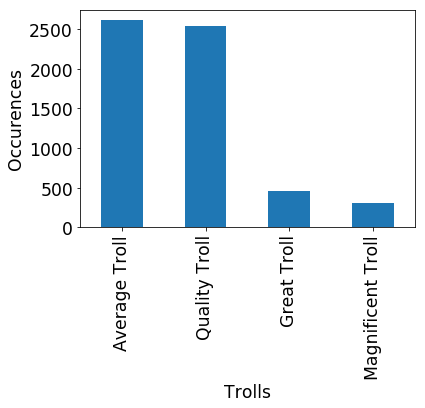

In [15]:
lf_data.quality_content.value_counts().plot(kind='bar')
plt.ylabel('Occurences', fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.xlabel('Trolls', fontsize='xx-large')
plt.xticks(fontsize='xx-large')

In [16]:
lf_data.quality_content.value_counts()

Average Troll        2614
Quality Troll        2545
Great Troll           460
Magnificent Troll     302
Name: quality_content, dtype: int64

In [17]:
len(lf_data)

5921

## Function to plot the confusion matrix

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(4, 4))

In [19]:
len(lf_data)

5921

# Text analysis
## Bag of words
This section aimsto present the `baf of word` approach on linuxfr data. I follow here the [official documentation](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).


In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(lf_data['content'].values)
X_train_counts.shape

(5921, 78879)

In [21]:
count_vect.vocabulary_.get(u'linux')

42616

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(5921, 78879)

### From occurences to frequencies
#### tf_transformer (Term Frequencies)
The frequency of word is computated

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(5921, 78879)

#### tfidf_transformer (Term Frequency times Inverse Document Frequency)
In this approach, only words that differs from document matters)

In [24]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(5921, 78879)

## Buiding a Pipeline

## Training a classifier
### Bayes  approach : MultinomialNB

MultinomialNB is the simpliest approach.

In [25]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, targets)
training_journals = ['Sécuriser son serveur avec la commande sudo rm -rf /*', 
                     'Debian is dying', 
                     'Windows Millenium est meilleur que Linux sur calculatrice graphique',
                     "MultiDeskOS est 42% plus performant que Redhat 3.0.3 (Picasso)",
                     "Pierre Tramo président !",
                     "Des chocolatines au menu des cantines situées dans les DOM-TOM", 
                     "1515, l’année du Desktop Linux!"]
X_new_counts = count_vect.transform(training_journals)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = classifier.predict(X_new_tfidf)
for doc, category in zip(training_journals, predicted):
    print('%r => %s' % (doc, category))

'Sécuriser son serveur avec la commande sudo rm -rf /*' => Quality Troll
'Debian is dying' => Quality Troll
'Windows Millenium est meilleur que Linux sur calculatrice graphique' => Quality Troll
'MultiDeskOS est 42% plus performant que Redhat 3.0.3 (Picasso)' => Average Troll
'Pierre Tramo président !' => Average Troll
'Des chocolatines au menu des cantines situées dans les DOM-TOM' => Quality Troll
'1515, l’année du Desktop Linux!' => Average Troll


In [26]:
predicted_proba = classifier.predict_proba(X_new_tfidf)
print(targets_names)
predicted_proba

['Average Troll', 'Great Troll', 'Magnificent Troll', 'Quality Troll']


array([[ 0.38146407,  0.01242555,  0.00699732,  0.59911306],
       [ 0.45180296,  0.03300345,  0.01880854,  0.49638505],
       [ 0.37809693,  0.0190014 ,  0.00917897,  0.5937227 ],
       [ 0.47083803,  0.0629247 ,  0.02837355,  0.43786371],
       [ 0.54130358,  0.04642992,  0.03861831,  0.37364818],
       [ 0.45172753,  0.03297976,  0.01805764,  0.49723507],
       [ 0.59237292,  0.01164186,  0.00420374,  0.39178148]])

## Buiding a Pipeline

In [27]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])

In [28]:
text_clf = text_clf.fit(lf_data.content, targets)

## Test the model on its own data

In [29]:
diaries_test = lf_data.sample(frac=0.2)

predicted = text_clf.predict(diaries_test['quality_content'])
#predicted

In [30]:
from sklearn.metrics import confusion_matrix, f1_score
score = f1_score(diaries_test['quality_content'], predicted, average='weighted')
print('Diaries:', len(lf_data))
print('Score:', score)

Diaries: 5921
Score: 0.255963872035


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[  0   0   0 538]
 [  0   0   0  89]
 [ 62   0   0   0]
 [  0   0   0 495]]
Normalized confusion matrix
[[ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


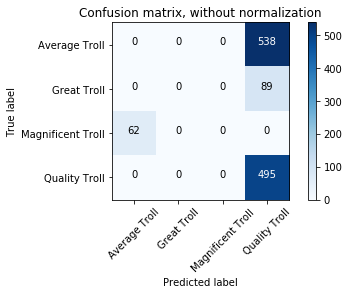

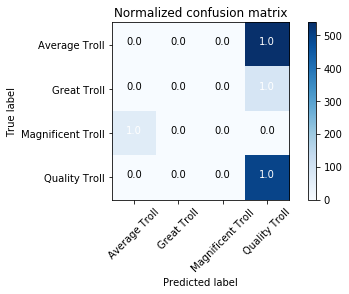

In [31]:
# Compute confusion matrix
import itertools
cnf_matrix = confusion_matrix(diaries_test['quality_content'], predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=targets_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=targets_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [32]:
len(lf_data)

5921

# Support vector machine (SVM)
It is widely regarded as one of the best text classification algorithms (http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

From the doc:
 ‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. 

* ‘f1’ 	metrics.f1_score 	for binary targets  
* ‘f1_micro’ 	metrics.f1_score 	micro-averaged  
* ‘f1_macro’ 	metrics.f1_score 	macro-averaged  
* ‘f1_weighted’ 	metrics.f1_score 	weighted average  
* ‘f1_samples’ 	metrics.f1_score 	by multilabel sample  

SGDClassifier: loss = The loss function to be used. Defaults to ‘hinge’, which gives a linear SVM. The ‘log’ loss gives logistic regression, a probabilistic classifier. __‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates.__ ‘squared_hinge’ is like hinge but is quadratically penalized. ‘perceptron’ is the linear loss used by the perceptron algorithm. The other losses are designed for regression but can be useful in classification as well; see SGDRegressor for a description.


In [33]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', SGDClassifier()),])
_ = text_clf.fit(lf_data.content, lf_data.quality_content)
predicted = text_clf.predict(diaries_test.content)
np.mean(predicted == diaries_test.quality_content)

0.96452702702702697

In [34]:
from sklearn import metrics
print(metrics.classification_report(diaries_test.quality_content, predicted, target_names=targets_names))

                   precision    recall  f1-score   support

    Average Troll       0.97      0.96      0.96       538
      Great Troll       0.99      0.96      0.97        89
Magnificent Troll       1.00      0.94      0.97        62
    Quality Troll       0.95      0.98      0.96       495

      avg / total       0.96      0.96      0.96      1184



Confusion matrix, without normalization
[[514   1   0  23]
 [  2  85   0   2]
 [  3   0  58   1]
 [ 10   0   0 485]]
Normalized confusion matrix
[[ 0.96  0.    0.    0.04]
 [ 0.02  0.96  0.    0.02]
 [ 0.05  0.    0.94  0.02]
 [ 0.02  0.    0.    0.98]]


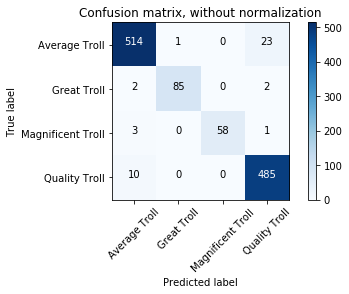

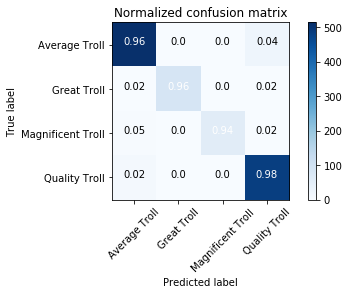

In [35]:
metrics.confusion_matrix(diaries_test.quality_content, predicted)
# Compute confusion matrix
import itertools
cnf_matrix = confusion_matrix(diaries_test['quality_content'], predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=targets_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=targets_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(text_clf,  # steps to convert raw messages into models
                         lf_data.content,  # training data
                         lf_data.quality_content,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)

print('Total diaries classified:', len(lf_data))
print('Score:', sum(scores)/len(scores))

[ 0.56  0.54  0.55  0.52  0.54  0.53  0.53  0.57  0.56  0.56]
Total diaries classified: 5921
Score: 0.546367446963


Si on préfère afficher la matrice de confusion, 

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score,precision_score

k_fold = KFold(n_splits=10)
scores = []
confusion = np.array([[0, 0,0,0], [0, 0,0,0], [0, 0,0,0], [0, 0,0,0]])
for train_indices, test_indices in k_fold.split(lf_data):
    train_text = lf_data.iloc[train_indices]['content'].values
    train_y = lf_data.iloc[train_indices]['quality_content'].values
    test_text = lf_data.iloc[test_indices]['content'].values
    test_y = lf_data.iloc[test_indices]['quality_content'].values
    text_clf.fit(train_text, train_y)
    predictions = text_clf.predict(test_text)
    confusion += confusion_matrix(test_y, predictions)
    score = f1_score(test_y, predictions, average='weighted')
    ps = precision_score(test_y, predictions, average='weighted')
    scores.append(score)

print('Total diaries classified:', len(lf_data))
print('Score:', sum(scores)/len(scores))
print('Confusion matrix:')
print(confusion)

Total diaries classified: 5921
Score: 0.517031844562
Confusion matrix:
[[1429   25   10 1150]
 [ 254   16   14  176]
 [ 163   12   28   99]
 [ 771    8    6 1760]]


In [38]:
scores

[0.52674193930832813,
 0.48318684704311976,
 0.5117023333113857,
 0.50029344305792656,
 0.52179134297296403,
 0.52858002802931348,
 0.52104195538055964,
 0.50287334894704838,
 0.55752176025840749,
 0.51658544730711664]

Confusion matrix, without normalization
[[1429   25   10 1150]
 [ 254   16   14  176]
 [ 163   12   28   99]
 [ 771    8    6 1760]]
Normalized confusion matrix
[[ 0.55  0.01  0.    0.44]
 [ 0.55  0.03  0.03  0.38]
 [ 0.54  0.04  0.09  0.33]
 [ 0.3   0.    0.    0.69]]


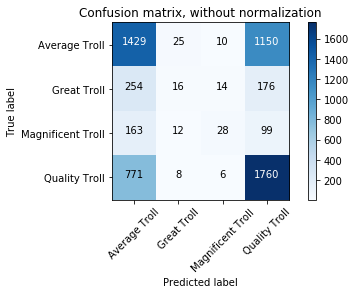

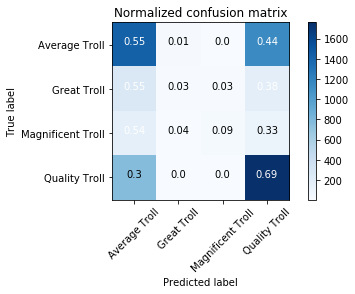

In [39]:
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=targets_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=targets_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Parameter tuning using grid search

__** TODO : changer les paramètres à optimiser **__

In [40]:
from time import time
from sklearn.model_selection import GridSearchCV

In [41]:
# Default parameters
#loss='huber', penalty='l2',alpha=1e-5, n_iter=15, random_state=12

List of available parameters:

In [42]:
sorted(text_clf.get_params().keys())

['clf',
 'clf__alpha',
 'clf__average',
 'clf__class_weight',
 'clf__epsilon',
 'clf__eta0',
 'clf__fit_intercept',
 'clf__l1_ratio',
 'clf__learning_rate',
 'clf__loss',
 'clf__n_iter',
 'clf__n_jobs',
 'clf__penalty',
 'clf__power_t',
 'clf__random_state',
 'clf__shuffle',
 'clf__verbose',
 'clf__warm_start',
 'steps',
 'tfidf',
 'tfidf__norm',
 'tfidf__smooth_idf',
 'tfidf__sublinear_tf',
 'tfidf__use_idf',
 'vect',
 'vect__analyzer',
 'vect__binary',
 'vect__decode_error',
 'vect__dtype',
 'vect__encoding',
 'vect__input',
 'vect__lowercase',
 'vect__max_df',
 'vect__max_features',
 'vect__min_df',
 'vect__ngram_range',
 'vect__preprocessor',
 'vect__stop_words',
 'vect__strip_accents',
 'vect__token_pattern',
 'vect__tokenizer',
 'vect__vocabulary']

In [43]:
params = {
    'tfidf__use_idf': (True, False),
    'clf__loss':('huber', 'modified_huber', 'epsilon_insensitive',  'hinge', 'log'),
    'clf__alpha':(10,0.001, 0.00001),
    
}
gs_clf = GridSearchCV(text_clf, params, n_jobs=-1, verbose=0, refit=True,scoring='accuracy',)
print("Performing grid search...")
print("pipeline:", [name for name, _ in text_clf.steps])
print("parameters:")
print(params)
t0 = time()
gs_clf = gs_clf.fit(lf_data.content, targets)
print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % gs_clf.best_score_)
print("Best parameters set:")
best_parameters = gs_clf.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'tfidf__use_idf': (True, False), 'clf__loss': ('huber', 'modified_huber', 'epsilon_insensitive', 'hinge', 'log'), 'clf__alpha': (10, 0.001, 1e-05)}
done in 102.020s

Best score: 0.545
Best parameters set:
	clf__alpha: 0.001
	clf__loss: 'modified_huber'
	tfidf__use_idf: True


In [44]:
gs_clf.best_score_

0.54450261780104714

In [45]:
for param_name in sorted(params.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.001
clf__loss: 'modified_huber'
tfidf__use_idf: True


In [46]:
gs_clf.best_estimator_

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))])

In [47]:
gs_pd = gs_clf.cv_results_

In [48]:
# summarize results
print("Best: %f using %s" % (gs_clf.best_score_, gs_clf.best_params_))
means = gs_clf.cv_results_['mean_test_score']
stds = gs_clf.cv_results_['std_test_score']
params = gs_clf.cv_results_['params']
scores_tab = []
i = 0
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    scores_tab.append(mean)

Best: 0.544503 using {'clf__alpha': 0.001, 'clf__loss': 'modified_huber', 'tfidf__use_idf': True}
0.434217 (0.006197) with: {'clf__alpha': 10, 'clf__loss': 'huber', 'tfidf__use_idf': True}
0.430839 (0.001424) with: {'clf__alpha': 10, 'clf__loss': 'huber', 'tfidf__use_idf': False}
0.437595 (0.005511) with: {'clf__alpha': 10, 'clf__loss': 'modified_huber', 'tfidf__use_idf': True}
0.437595 (0.005511) with: {'clf__alpha': 10, 'clf__loss': 'modified_huber', 'tfidf__use_idf': False}
0.429826 (0.000150) with: {'clf__alpha': 10, 'clf__loss': 'epsilon_insensitive', 'tfidf__use_idf': True}
0.429826 (0.000150) with: {'clf__alpha': 10, 'clf__loss': 'epsilon_insensitive', 'tfidf__use_idf': False}
0.433711 (0.005480) with: {'clf__alpha': 10, 'clf__loss': 'hinge', 'tfidf__use_idf': True}
0.433711 (0.005480) with: {'clf__alpha': 10, 'clf__loss': 'hinge', 'tfidf__use_idf': False}
0.440466 (0.008460) with: {'clf__alpha': 10, 'clf__loss': 'log', 'tfidf__use_idf': True}
0.435062 (0.004870) with: {'clf__al

In [48]:
from sklearn.metrics import f1_score
f1_score(lf_data.quality_content, y_pred, average='weighted')

NameError: name 'y_pred' is not defined

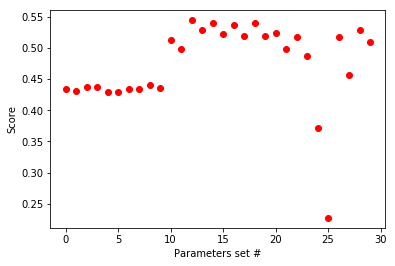

In [49]:
import matplotlib.pyplot as plt
#scores_tab = [0.5,0.65,0.7,0.2]
plt.plot(scores_tab, 'ro')
plt.xlabel('Parameters set #')
plt.ylabel('Score')
plt.show()

Diaries: 1184
Score: 0.964537397506
Confusion matrix, without normalization
[[514   1   0  23]
 [  2  85   0   2]
 [  3   0  58   1]
 [ 10   0   0 485]]
Normalized confusion matrix
[[ 0.96  0.    0.    0.04]
 [ 0.02  0.96  0.    0.02]
 [ 0.05  0.    0.94  0.02]
 [ 0.02  0.    0.    0.98]]


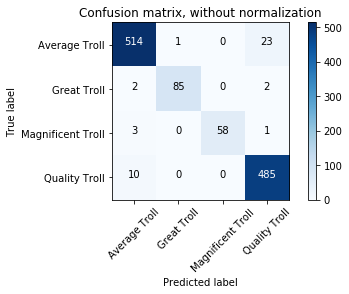

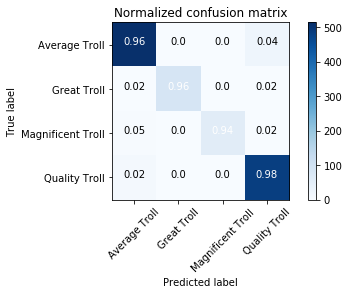

                   precision    recall  f1-score   support

    Average Troll       0.97      0.96      0.96       538
      Great Troll       0.99      0.96      0.97        89
Magnificent Troll       1.00      0.94      0.97        62
    Quality Troll       0.95      0.98      0.96       495

      avg / total       0.96      0.96      0.96      1184



In [50]:
score = f1_score(diaries_test['quality_content'], predicted, average='weighted')
print('Diaries:', len(diaries_test))
print('Score:', score)
cnf_matrix = confusion_matrix(diaries_test['quality_content'], predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=targets_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=targets_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print(metrics.classification_report(diaries_test.quality_content, predicted, target_names=targets_names))

## Try our model on new data

In [51]:
filename = r'out_of_sample.csv'
lf_out = pd.read_csv(filename, encoding="UTF-8", sep='£', engine='python', quotechar='µ')
lf_out.dtypes

title               object
author              object
url                 object
score              float64
content             object
quality_content     object
count                int64
dtype: object

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

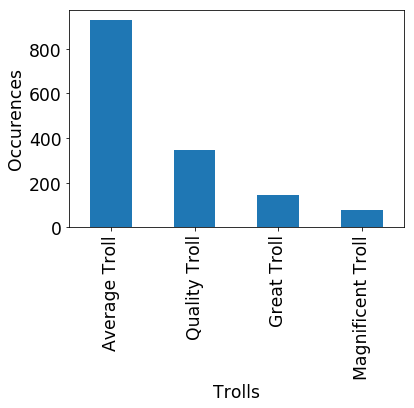

In [52]:
lf_out = lf_out.reindex(np.random.permutation(lf_out.index))
lf_out.quality_content.value_counts().plot(kind='bar')
plt.ylabel('Occurences', fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.xlabel('Trolls', fontsize='xx-large')
plt.xticks(fontsize='xx-large')

Diaries: 1500
Score: 0.455886391359
Confusion matrix, without normalization
[[499   9   8 412]
 [100   2   2  42]
 [ 48   2   7  22]
 [152   1   0 194]]
Normalized confusion matrix
[[ 0.54  0.01  0.01  0.44]
 [ 0.68  0.01  0.01  0.29]
 [ 0.61  0.03  0.09  0.28]
 [ 0.44  0.    0.    0.56]]


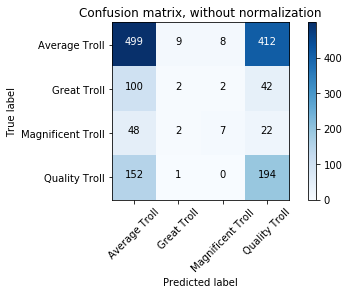

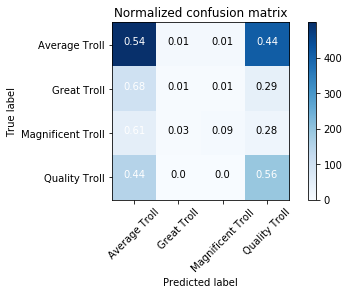

                   precision    recall  f1-score   support

    Average Troll       0.62      0.54      0.58       928
      Great Troll       0.14      0.01      0.03       146
Magnificent Troll       0.41      0.09      0.15        79
    Quality Troll       0.29      0.56      0.38       347

      avg / total       0.49      0.47      0.46      1500



In [54]:
predicted_out = text_clf.predict(lf_out.content)
np.mean(predicted_out == lf_out.quality_content)
score_out = f1_score(lf_out['quality_content'], predicted_out, average='weighted')
print('Diaries:', len(lf_out))
print('Score:', score_out)
cnf_matrix_out = confusion_matrix(lf_out['quality_content'], predicted_out)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_out, classes=targets_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_out, classes=targets_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print(metrics.classification_report(lf_out.quality_content, predicted_out, target_names=targets_names))